In [1]:
%cd /Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK
import numpy as np 
import matplotlib.pyplot as plt 
from SYK_fft import *
import testingscripts
from scipy.fft import fft,ifft,fftfreq,fftshift

testingscripts.realtimeFFT_validator() # Should return True

/Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK


True

## BOTTOM LINE: we need eta>dw in order to capture the heaviside function accurately in the fourier transform
### even $\eta = d\omega*(1+0.0001)$ is sufficient. 

In [2]:
M = int(2**12) #number of points in the grid
T = int(2**9) #upper cut-off fot the time
dt = (2*T)/((2*M))
t = dt * (np.arange(2*M) - M)

dw = np.pi/(M*dt)
eta = dw*10.
omega = dw * (np.arange(2*M) - M) 
np.testing.assert_almost_equal(dt*dw*M,np.pi,5, "Error in fundamentals")
err = 1e-2

#delta = 0.420374134464041
np.testing.assert_almost_equal(np.max(np.abs(omega)),np.pi*M/T,5,"Error in creating omega grid")

print("T = ", T, ", dw =  ", f'{dw:.6f}', ", dt = ", f'{dt:.6f}', ', omega_max = ', f'{omega[-1]:.3f}' ) 

T =  512 , dw =   0.006136 , dt =  0.125000 , omega_max =  25.127


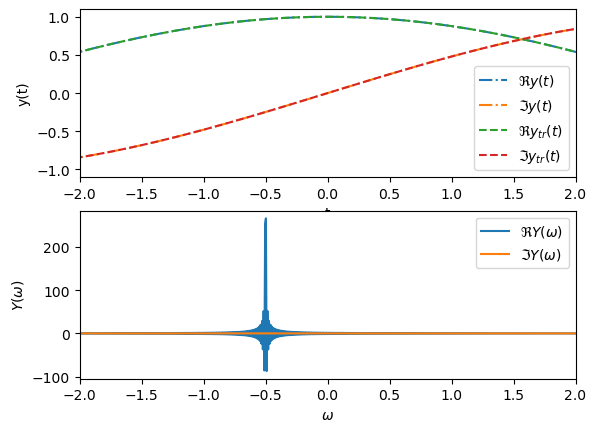

In [3]:
omega0 = 0.5
#y = np.sin(omega0*t)
#y = (1/np.sqrt(2*np.pi))*np.exp(-(t**2)/2)
y = np.exp(1j*omega0*t)
Y = 1/np.sqrt(2*np.pi)*time2freq(y,M,dt)
ytr = 1/np.sqrt(2*np.pi)*freq2time(Y,M,dt)

fig, (ax1,ax2) = plt.subplots(2)

ax1.plot(t,np.real(y),'-.',label = r'$\Re{y(t)}$')
ax1.plot(t,np.imag(y),'-.', label = r'$\Im{y(t)}$')
ax1.plot(t,np.real(ytr),'--',label = r'$\Re{y_{tr}(t)}$')
ax1.plot(t,np.imag(ytr),'--', label = r'$\Im{y_{tr}(t)}$')
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax1.set_xlim(-2,2)
ax1.legend()

ax2.plot(omega,np.real(Y),label = r'$\Re{Y(\omega)}$')
ax2.plot(omega,np.imag(Y), label = r'$\Im{Y(\omega)}$')
ax2.set_xlabel(r'$\omega $')
ax2.set_ylabel(r'$Y(\omega)$')
ax2.set_xlim(-2,2)
ax2.legend()

### Testing free fermion green

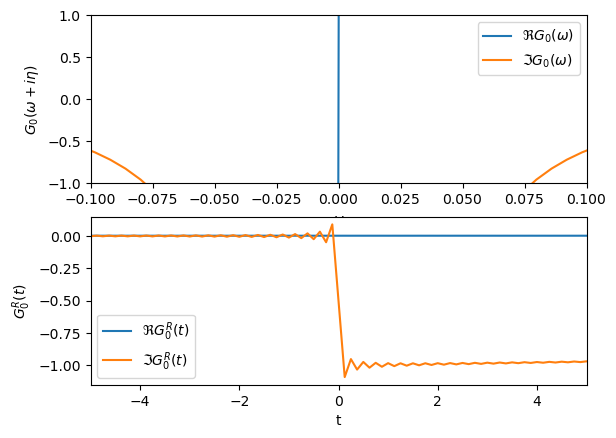

In [9]:
fig,ax = plt.subplots(2)

r = 0
eta = dw*1.000001

GR_free_omega = 1./(omega+1j*eta - r)
GR_free_t = (0.5/np.pi)*freq2time(GR_free_omega,M,dt)

#Gforw = GR_free_t[M:]
#Grev = GR_free_t[:M]
#Grec = np.concatenate((-1.0*Grev,Gforw))

ax[0].plot(omega,np.real(GR_free_omega), label = r'$\Re{G_0(\omega)}$')
ax[0].plot(omega,np.imag(GR_free_omega), label = r'$\Im{G_0(\omega)}$')
ax[0].set_xlabel(r'$\omega$')
ax[0].set_ylabel(r'$G_0(\omega+i\eta)$')
ax[0].set_xlim(-0.1,0.1)
ax[0].set_ylim(-1,1)
ax[0].legend(loc = 'upper right')


ax[1].plot(t,np.real(GR_free_t), label = r'$\Re G^R_0(t)$')
ax[1].plot(t,np.imag(GR_free_t), label = r'$\Im G^R_0(t)$')
#ax[1].plot(t,np.real(Grec), label = r'$\Re Grec(t)$')
#ax[1].plot(t,np.imag(Grec), label = r'$\Im Grec(t)$')
ax[1].set_xlabel('t')
ax[1].set_ylabel(r'$G_0^R(t)$')
ax[1].set_xlim(-5,5)
ax[1].legend(loc = 'lower left')

### Testing free boson retarderd green 

" But wait, shouldn't D_R(t) also be proportional to \theta(t)????? : suspicious "

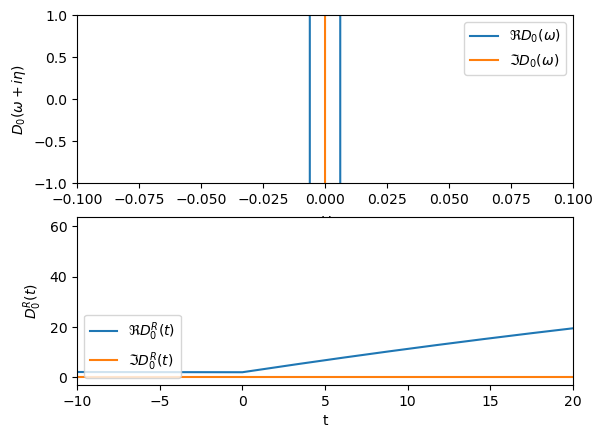

In [10]:
fig,ax = plt.subplots(2)

omega0 = np.sqrt(r)
DR_free_omega = 1./(r - (omega+1j*eta)**2)
#DR_free_omega_left = 0.5/omega0 * (1/(omega +1j*eta + omega0 ))
#DR_free_omega_right = 0.5/omega0 * (-1/(omega + 1j*eta - omega0))
#DR_free_omega = DR_free_omega_left + DR_free_omega_right
DR_free_t = (0.5/np.pi)*freq2time(DR_free_omega,M,dt)
#DR_free_t_left = (0.5/np.pi)*freq2time(DR_free_omega_left,M,dt)
#DR_free_t_right = (0.5/np.pi)*freq2time(DR_free_omega_right,M,dt)
#DR_free_t= DR_free_t_left + DR_free_t_right

ax[0].plot(omega,np.real(DR_free_omega), label = r'$\Re{D_0(\omega)}$')
ax[0].plot(omega,np.imag(DR_free_omega), label = r'$\Im{D_0(\omega)}$')
ax[0].set_xlabel(r'$\omega$')
ax[0].set_ylabel(r'$D_0(\omega+i\eta)$')
ax[0].set_xlim(-0.1,0.1)
ax[0].set_ylim(-1,1)
ax[0].legend(loc = 'upper right')

ax[1].plot(t,np.real(DR_free_t), label = r'$\Re D^R_0(t)$')
ax[1].plot(t,np.imag(DR_free_t), label = r'$\Im D^R_0(t)$')
ax[1].set_xlabel('t')
ax[1].set_ylabel(r'$D_0^R(t)$')
ax[1].set_xlim(-10,20)
ax[1].legend(loc = 'lower left')

''' But wait, shouldn't D_R(t) also be proportional to \theta(t)????? : suspicious '''